In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin


In [14]:

df = pd.read_csv('Mall_Customers.csv')

In [15]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Print the shape of X
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Print the shape and few samples of scaled data
print(X_scaled.shape)
print(X_scaled[:5]) 

(200, 2)
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [17]:
def kmeans(X, k, max_iters=100):
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[random_indices]

    print("Initial centroids:\n", centroids)

    for i in range(max_iters):
        labels = pairwise_distances_argmin(X, centroids)

        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break  # this means no more convergence, hence stop the algorithm

        centroids = new_centroids

    return centroids, labels

# Run the K-Means algorithm
centroids, labels = kmeans(X_scaled, 5)

# Print the final centroids
print("Final centroids:\n", centroids)

Initial centroids:
 [[-0.67025518  0.38045129]
 [ 0.09313341 -0.16305055]
 [ 0.78018313 -1.75473454]
 [-1.58632148 -1.83237767]
 [ 0.39848884  1.73920592]]
Final centroids:
 [[-1.32954532  1.13217788]
 [-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [ 0.99158305  1.23950275]]


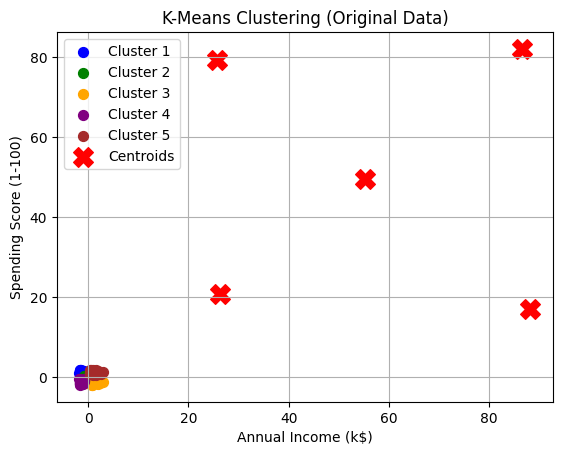

<Figure size 640x480 with 0 Axes>

In [18]:
colors = ['blue', 'green', 'orange', 'purple', 'brown']
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
for i, color in enumerate(colors):
    plt.scatter(X_scaled[, 0], X_scaled[, 1], c=color, label=cluster_names[i], s=50, marker='o')
centroid_original = scaler.inverse_transform(centroids)  # Inverse transform centroids for original scale
plt.scatter(centroid_original[:, 0], centroid_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (Original Data)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('results.png', format="png")

In [19]:
def predict_cluster(input_data, centroids, scaler):
    input_array = np.array([input_data])
    input_standardized = scaler.transform(input_array)  # Standardize the input
    distances = np.linalg.norm(input_standardized - centroids, axis=1)
    return np.argmin(distances)

# Random input for prediction
random_input = [25, 50]  #Annual Income = 25k$, Spending Score = 50
predicted_cluster = predict_cluster(random_input, centroids, scaler)

print(f'Random input: {random_input} -> Predicted cluster: {predicted_cluster}')

Random input: [25, 50] -> Predicted cluster: 3
